### 교육 수준: 재중, 중퇴, 졸업을 '교육수준'으로 묶었다. 또한 대학교는 4년제 이상, 4년제 미만을 '대학교' 항목으로 통합했다.
### 아래의 범죄에 대해 '성범죄 전체' 항목으로 묶어 시각화 하였다.
> '강력범죄(소계)', '강간', '강간·강제추행' '강도', '강제추행', '기타(강간·강제추행등)', '유사강간'.

> 참고로 2011년과 2012년의 '강간·강제추행' 항목은 2013년 이후 '기타(강간·강제추행등)' 항목으로 바뀌었음.
### 아래의 없는 자료에 대해서는 0으로 처리하였다.
> 2011년: '강간', '강제추행', '기타', '유사강간' 범죄의 범죄자 수, 교육 수준이 '대학원'인 범죄자.

> 2012년: '강간', '강제추행', '유사강간' 범죄의 범죄자 수.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# 한글 폰트 적용
from matplotlib import font_manager, rc
font_location = "c:/Windows/fonts/malgun.ttf"
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [2]:
crime_edu = pd.read_csv('범죄자_교육정도.csv', encoding='euc-kr', thousands=',', header=3)
crime_edu.head()

,No,자료시점,분류,분류.1,원자료,원자료.1,원자료.2,원자료.3,원자료.4,원자료.5,...,원자료.12,원자료.13,원자료.14,원자료.15,원자료.16,원자료.17,원자료.18,원자료.19,원자료.20,원자료.21
0,1,2011년,총계,총계,1815233.0,8083.0,194.0,10411.0,55766.0,19173.0,...,5850.0,54073.0,29591.0,20776.0,142532.0,NaN,NaN,NaN,63918.0,600986.0
1,2,2011년,강력범죄,강력범죄(소계),25346.0,152.0,10.0,295.0,968.0,483.0,...,172.0,790.0,735.0,378.0,2005.0,NaN,NaN,NaN,880.0,5886.0
2,3,2011년,강력범죄,강간,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2011년,강력범죄,강간·강제추행,17652.0,89.0,4.0,181.0,619.0,300.0,...,114.0,631.0,610.0,261.0,1716.0,NaN,NaN,NaN,539.0,4831.0
4,5,2011년,강력범죄,강도,4890.0,22.0,3.0,45.0,138.0,125.0,...,43.0,87.0,91.0,78.0,171.0,NaN,NaN,NaN,204.0,606.0


In [3]:
crime_edu.columns = ['No', '시점', '대분류', '범죄 분류', '총계', '불취학', '초등 재중', 
                        '초등 중퇴', '초등 졸업', '중학교 재중', '중학교 중퇴', '중학교 졸업', 
                        '고등 재중', '고등 중퇴', '고등 졸업', '대학(4년 미만) 재중', 
                        '대학(4년 미만) 중퇴', '대학(4년 미만) 졸업', '대학(4년 이상) 재중', 
                        '대학(4년 이상) 중퇴', '대학(4년 이상) 졸업', '대학원 재중', 
                        '대학원 중퇴', '대학원 졸업', '기타', '미상']
crime_edu.head(10)

,No,시점,대분류,범죄 분류,총계,불취학,초등 재중,초등 중퇴,초등 졸업,중학교 재중,...,대학(4년 미만) 중퇴,대학(4년 미만) 졸업,대학(4년 이상) 재중,대학(4년 이상) 중퇴,대학(4년 이상) 졸업,대학원 재중,대학원 중퇴,대학원 졸업,기타,미상
0,1,2011년,총계,총계,1815233.0,8083.0,194.0,10411.0,55766.0,19173.0,...,5850.0,54073.0,29591.0,20776.0,142532.0,NaN,NaN,NaN,63918.0,600986.0
1,2,2011년,강력범죄,강력범죄(소계),25346.0,152.0,10.0,295.0,968.0,483.0,...,172.0,790.0,735.0,378.0,2005.0,NaN,NaN,NaN,880.0,5886.0
2,3,2011년,강력범죄,강간,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2011년,강력범죄,강간·강제추행,17652.0,89.0,4.0,181.0,619.0,300.0,...,114.0,631.0,610.0,261.0,1716.0,NaN,NaN,NaN,539.0,4831.0
4,5,2011년,강력범죄,강도,4890.0,22.0,3.0,45.0,138.0,125.0,...,43.0,87.0,91.0,78.0,171.0,NaN,NaN,NaN,204.0,606.0
5,6,2011년,강력범죄,강제추행,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2011년,강력범죄,기타(강간·강제추행등),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2011년,강력범죄,유사강간,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2012년,총계,총계,1723815.0,8641.0,185.0,10940.0,57082.0,24597.0,...,5885.0,56944.0,32504.0,23339.0,150959.0,4399.0,1923.0,18665.0,44582.0,538397.0
9,10,2012년,강력범죄,강력범죄(소계),23789.0,170.0,12.0,306.0,998.0,620.0,...,148.0,807.0,922.0,438.0,2022.0,125.0,38.0,298.0,514.0,5110.0


In [4]:
crime_edu.set_index('범죄 분류', drop=True, append=False, inplace=True)
crime_edu.drop(['No', '대분류', '총계'], axis=1, inplace=True)
crime_edu.drop(['총계'], axis=0, inplace=True)
crime_edu.head()

,시점,불취학,초등 재중,초등 중퇴,초등 졸업,중학교 재중,중학교 중퇴,중학교 졸업,고등 재중,고등 중퇴,...,대학(4년 미만) 중퇴,대학(4년 미만) 졸업,대학(4년 이상) 재중,대학(4년 이상) 중퇴,대학(4년 이상) 졸업,대학원 재중,대학원 중퇴,대학원 졸업,기타,미상
범죄 분류,,,,,,,,,,,,,,,,,,,,,
강력범죄(소계),2011년,152.0,10.0,295.0,968.0,483.0,838.0,1518.0,1329.0,1529.0,...,172.0,790.0,735.0,378.0,2005.0,NaN,NaN,NaN,880.0,5886.0
강간,2011년,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
강간·강제추행,2011년,89.0,4.0,181.0,619.0,300.0,373.0,862.0,890.0,752.0,...,114.0,631.0,610.0,261.0,1716.0,NaN,NaN,NaN,539.0,4831.0
강도,2011년,22.0,3.0,45.0,138.0,125.0,329.0,397.0,367.0,621.0,...,43.0,87.0,91.0,78.0,171.0,NaN,NaN,NaN,204.0,606.0
강제추행,2011년,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
crime_edu['최종_초등학교'] = crime_edu.iloc[:,2:5].sum(axis=1)
crime_edu['최종_중학교'] = crime_edu.iloc[:,5:8].sum(axis=1)
crime_edu['최종_고등학교'] = crime_edu.iloc[:,8:11].sum(axis=1)
crime_edu['최종_대학교'] = crime_edu.iloc[:,11:17].sum(axis=1)
crime_edu['최종_대학원'] = crime_edu.iloc[:,17:20].sum(axis=1)

crime_edu.head()

,시점,불취학,초등 재중,초등 중퇴,초등 졸업,중학교 재중,중학교 중퇴,중학교 졸업,고등 재중,고등 중퇴,...,대학원 재중,대학원 중퇴,대학원 졸업,기타,미상,최종_초등학교,최종_중학교,최종_고등학교,최종_대학교,최종_대학원
범죄 분류,,,,,,,,,,,,,,,,,,,,,
강력범죄(소계),2011년,152.0,10.0,295.0,968.0,483.0,838.0,1518.0,1329.0,1529.0,...,NaN,NaN,NaN,880.0,5886.0,1273.0,2839.0,9581.0,4251.0,0.0
강간,2011년,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
강간·강제추행,2011년,89.0,4.0,181.0,619.0,300.0,373.0,862.0,890.0,752.0,...,NaN,NaN,NaN,539.0,4831.0,804.0,1535.0,5994.0,3460.0,0.0
강도,2011년,22.0,3.0,45.0,138.0,125.0,329.0,397.0,367.0,621.0,...,NaN,NaN,NaN,204.0,606.0,186.0,851.0,2462.0,508.0,0.0
강제추행,2011년,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [6]:
crime_edu.drop(crime_edu.columns[[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 
                                  13, 14, 15, 16, 17, 18, 19]], axis=1, inplace=True)
crime_edu = crime_edu[['시점', '기타', '미상', '불취학', '최종_초등학교', 
                       '최종_중학교', '최종_고등학교', '최종_대학교', '최종_대학원']]
crime_edu.head(10)

,시점,기타,미상,불취학,최종_초등학교,최종_중학교,최종_고등학교,최종_대학교,최종_대학원
범죄 분류,,,,,,,,,
강력범죄(소계),2011년,880.0,5886.0,152.0,1273.0,2839.0,9581.0,4251.0,0.0
강간,2011년,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
강간·강제추행,2011년,539.0,4831.0,89.0,804.0,1535.0,5994.0,3460.0,0.0
강도,2011년,204.0,606.0,22.0,186.0,851.0,2462.0,508.0,0.0
강제추행,2011년,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
기타(강간·강제추행등),2011년,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
유사강간,2011년,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
강력범죄(소계),2012년,514.0,5110.0,170.0,1316.0,2720.0,9014.0,4484.0,461.0
강간,2012년,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [7]:
crime_edu_2011 = crime_edu[:7]
crime_edu_2012 = crime_edu[7:14]
crime_edu_2013 = crime_edu[14:21]
crime_edu_2014 = crime_edu[21:28]
crime_edu_2015 = crime_edu[28:35]
crime_edu_2016 = crime_edu[35:42]
crime_edu_2017 = crime_edu[42:49]
crime_edu_2018 = crime_edu[49:]

In [8]:
crime_edu_2011['시점'] = crime_edu_2011.fillna('2011년')
crime_edu_2012['시점'] = crime_edu_2012.fillna('2012년')
crime_edu_2013['시점'] = crime_edu_2013.fillna('2013년')
crime_edu_2014['시점'] = crime_edu_2014.fillna('2014년')
crime_edu_2015['시점'] = crime_edu_2015.fillna('2015년')
crime_edu_2016['시점'] = crime_edu_2016.fillna('2016년')
crime_edu_2017['시점'] = crime_edu_2017.fillna('2017년')
crime_edu_2018['시점'] = crime_edu_2018.fillna('2018년')

crime_edu.head(10)

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

,시점,기타,미상,불취학,최종_초등학교,최종_중학교,최종_고등학교,최종_대학교,최종_대학원
범죄 분류,,,,,,,,,
강력범죄(소계),2011년,880.0,5886.0,152.0,1273.0,2839.0,9581.0,4251.0,0.0
강간,2011년,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
강간·강제추행,2011년,539.0,4831.0,89.0,804.0,1535.0,5994.0,3460.0,0.0
강도,2011년,204.0,606.0,22.0,186.0,851.0,2462.0,508.0,0.0
강제추행,2011년,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
기타(강간·강제추행등),2011년,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
유사강간,2011년,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
강력범죄(소계),2012년,514.0,5110.0,170.0,1316.0,2720.0,9014.0,4484.0,461.0
강간,2012년,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [9]:
crime_edu_2011.loc['성범죄 전체'] = crime_edu_2011.sum(axis=0, skipna=False)
crime_edu_2011.loc['성범죄 전체', '시점'] = '2011년'

crime_edu_2012.loc['성범죄 전체'] = crime_edu_2012.sum(axis=0)
crime_edu_2012.loc['성범죄 전체', '시점'] = '2012년'

crime_edu_2013.loc['성범죄 전체'] = crime_edu_2013.sum(axis=0)
crime_edu_2013.loc['성범죄 전체', '시점'] = '2013년'

crime_edu_2014.loc['성범죄 전체'] = crime_edu_2014.sum(axis=0)
crime_edu_2014.loc['성범죄 전체', '시점'] = '2014년'

crime_edu_2015.loc['성범죄 전체'] = crime_edu_2015.sum(axis=0)
crime_edu_2015.loc['성범죄 전체', '시점'] = '2015년'

crime_edu_2016.loc['성범죄 전체'] = crime_edu_2016.sum(axis=0)
crime_edu_2016.loc['성범죄 전체', '시점'] = '2016년'

crime_edu_2017.loc['성범죄 전체'] = crime_edu_2017.sum(axis=0)
crime_edu_2017.loc['성범죄 전체', '시점'] = '2017년'

crime_edu_2018.loc['성범죄 전체'] = crime_edu_2018.sum(axis=0)
crime_edu_2018.loc['성범죄 전체', '시점'] = '2018년'

crime_edu_2011

C:\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,시점,기타,미상,불취학,최종_초등학교,최종_중학교,최종_고등학교,최종_대학교,최종_대학원
범죄 분류,,,,,,,,,
강력범죄(소계),2011년,880.0,5886.0,152.0,1273.0,2839.0,9581.0,4251.0,0.0
강간,2011년,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
강간·강제추행,2011년,539.0,4831.0,89.0,804.0,1535.0,5994.0,3460.0,0.0
강도,2011년,204.0,606.0,22.0,186.0,851.0,2462.0,508.0,0.0
강제추행,2011년,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
기타(강간·강제추행등),2011년,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
유사강간,2011년,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
성범죄 전체,2011년,NaN,NaN,NaN,2263.0,5225.0,18037.0,8219.0,0.0


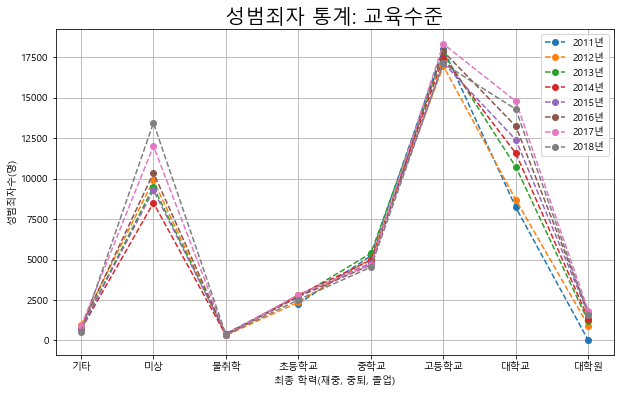

In [10]:
x = ['기타', '미상', '불취학', '초등학교', '중학교', '고등학교', '대학교', '대학원']
y1 = crime_edu_2011.loc['성범죄 전체'][1:]
y2 = crime_edu_2012.loc['성범죄 전체'][1:]
y3 = crime_edu_2013.loc['성범죄 전체'][1:]
y4 = crime_edu_2014.loc['성범죄 전체'][1:]
y5 = crime_edu_2015.loc['성범죄 전체'][1:]
y6 = crime_edu_2016.loc['성범죄 전체'][1:]
y7 = crime_edu_2017.loc['성범죄 전체'][1:]
y8 = crime_edu_2018.loc['성범죄 전체'][1:]


plt.figure(figsize=(10,6))
plt.title('성범죄자 통계: 교육수준', size=20)
plt.xlabel('최종 학력(재중, 중퇴, 졸업)')
plt.ylabel('성범죄자수(명)')
plt.grid()


plt.plot(x, y1, label='2011년', marker='o', linestyle='dashed')
plt.plot(x, y2, label='2012년', marker='o', linestyle='dashed')
plt.plot(x, y3, label='2013년', marker='o', linestyle='dashed')
plt.plot(x, y4, label='2014년', marker='o', linestyle='dashed')
plt.plot(x, y5, label='2015년', marker='o', linestyle='dashed')
plt.plot(x, y6, label='2016년', marker='o', linestyle='dashed')
plt.plot(x, y7, label='2017년', marker='o', linestyle='dashed')
plt.plot(x, y8, label='2018년', marker='o', linestyle='dashed')

plt.legend()

plt.show()

### 한국의 의무교육, 연령 등과의 연관성.